In [47]:
import pandas as pd
import numpy as np

In [48]:
dataset = pd.read_csv('/content/drive/MyDrive/Flight_fare_prediction/Cleaned_dataset.csv')

In [49]:
dataset.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [50]:
#checking the missing values
dataset.isnull().sum()

Date_of_journey      0
Journey_day          0
Airline              0
Flight_code          0
Class                0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
dtype: int64

#Let Graphically analyse the dataset.

In [51]:
#importing the dependencies
from matplotlib import pyplot as plt
import seaborn as sns

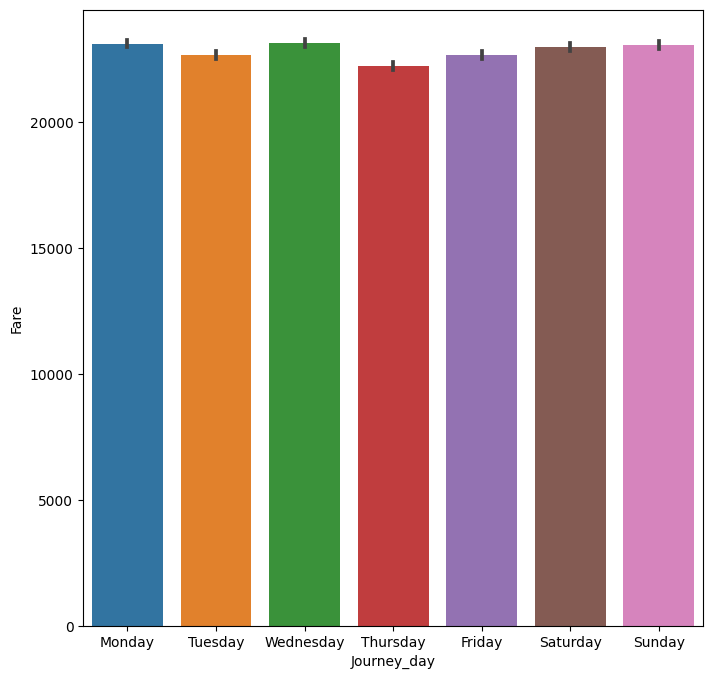

In [52]:
plt.figure(figsize=(8,8))
sns.barplot(x='Journey_day',y='Fare',data=dataset)
plt.show()

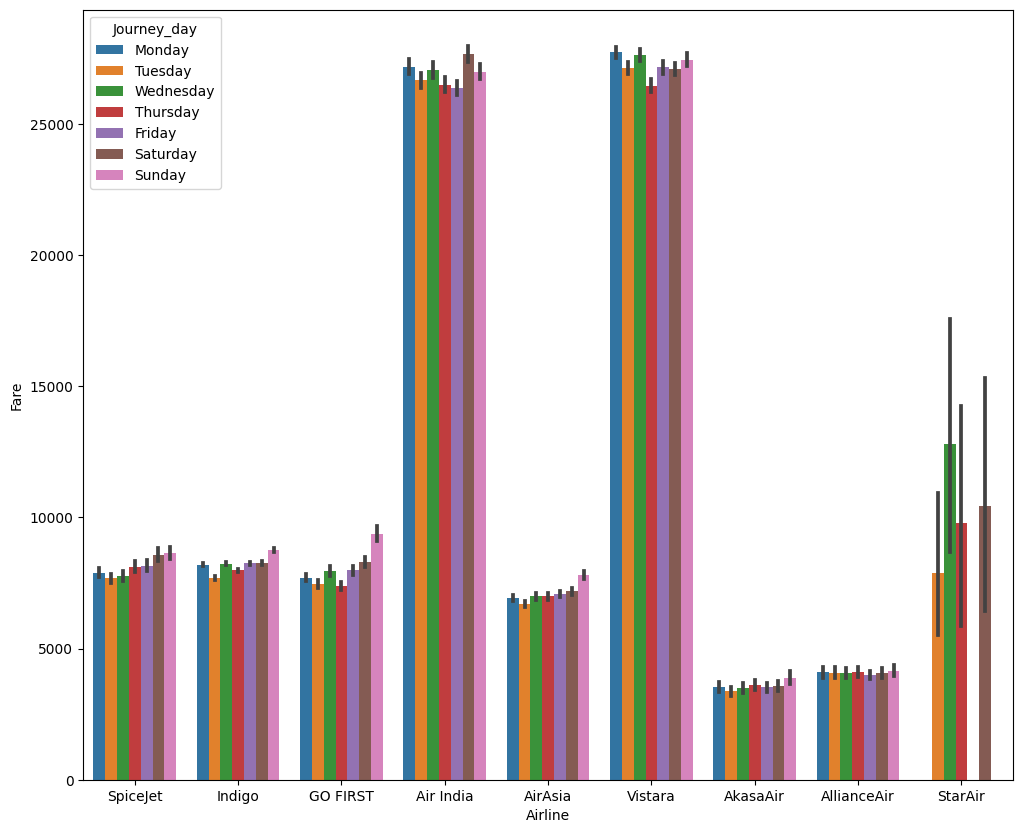

In [53]:
plt.figure(figsize=(12,10))
sns.barplot(x='Airline',y='Fare',hue='Journey_day',data=dataset)
plt.show()

The bar plot indicates that price is higher in Air India and Vistara compare to other airline,Journey day has minimum effect on fare.

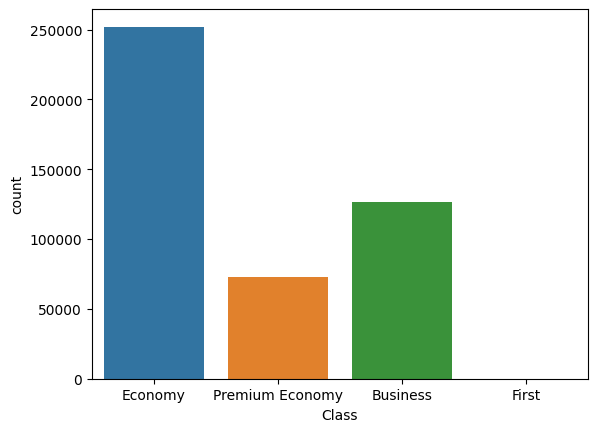

In [54]:
sns.countplot(x='Class',data=dataset)
plt.show()

The minimum fare is around 1307 in Economy class and maximum fare is around 143019 in First class.

In [55]:
dataset.describe()

,Duration_in_hours,Days_left,Fare
count,452088.000000,452088.000000,452088.000000
mean,12.349222,25.627902,22840.100890
std,7.431478,14.300846,20307.963002
min,0.750000,1.000000,1307.000000
25%,6.583300,13.000000,8762.750000
50%,11.333300,26.000000,13407.000000
75%,16.500000,38.000000,35587.000000
max,43.583300,50.000000,143019.000000


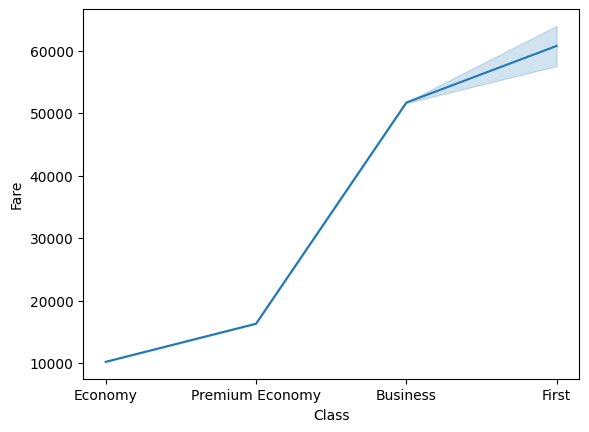

In [56]:
#graphically
sns.lineplot(x='Class',y='Fare',data=dataset)
plt.show()

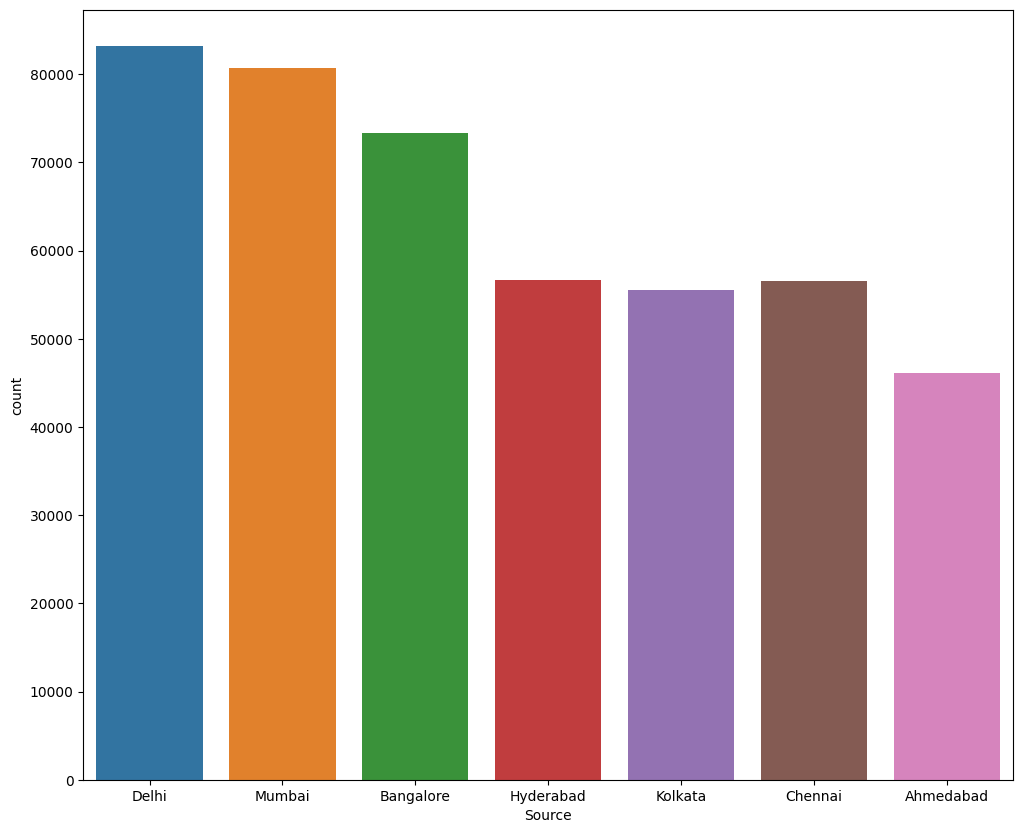

In [57]:
plt.figure(figsize=(12,10))
sns.countplot(x='Source',data=dataset)
plt.show()

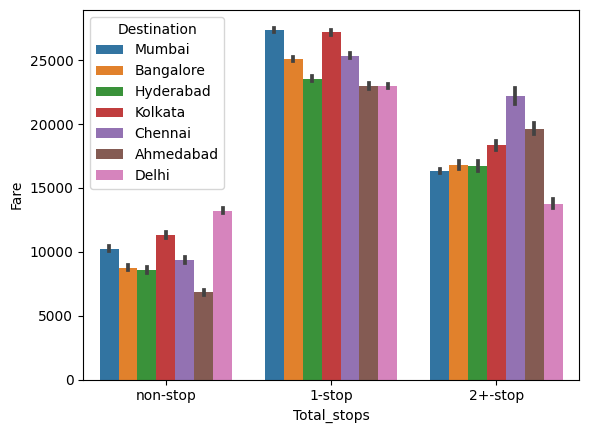

In [58]:
sns.barplot(x='Total_stops',y='Fare',hue='Destination',data=dataset)
plt.show()

Fare is maximum in 1-stop


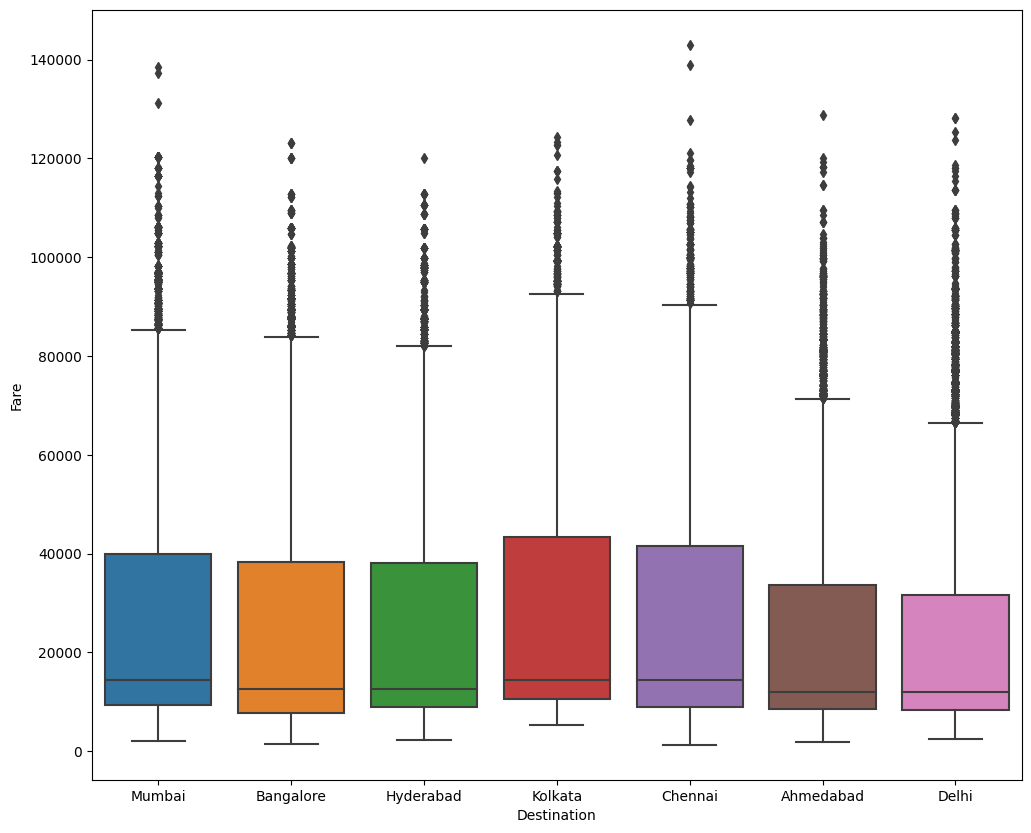

In [59]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Destination',y='Fare',data=dataset)
plt.show()

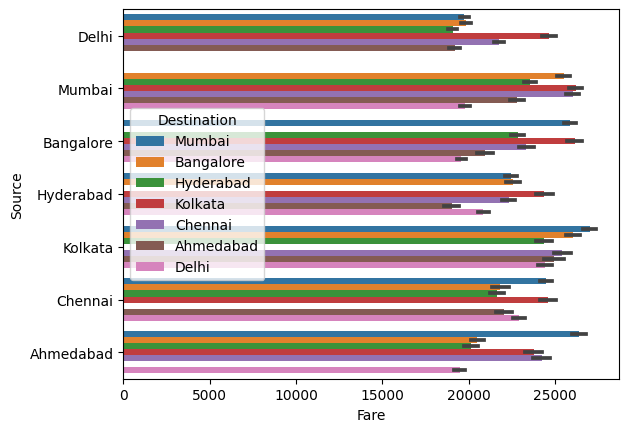

In [60]:
sns.barplot(x='Fare',y='Source',hue='Destination',data=dataset)
plt.show()

In [61]:
dataset['Total_stops'].value_counts()

1-stop      369650
non-stop     51755
2+-stop      30683
Name: Total_stops, dtype: int64

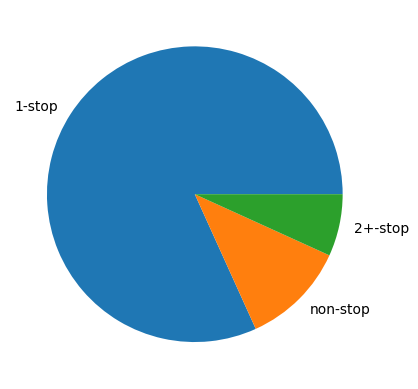

In [62]:
#representing total stop by pie chart
stop = ['1-stop','non-stop','2+-stop']
values=[369650,51755,30683]
plt.pie(values,labels=stop)
plt.show()


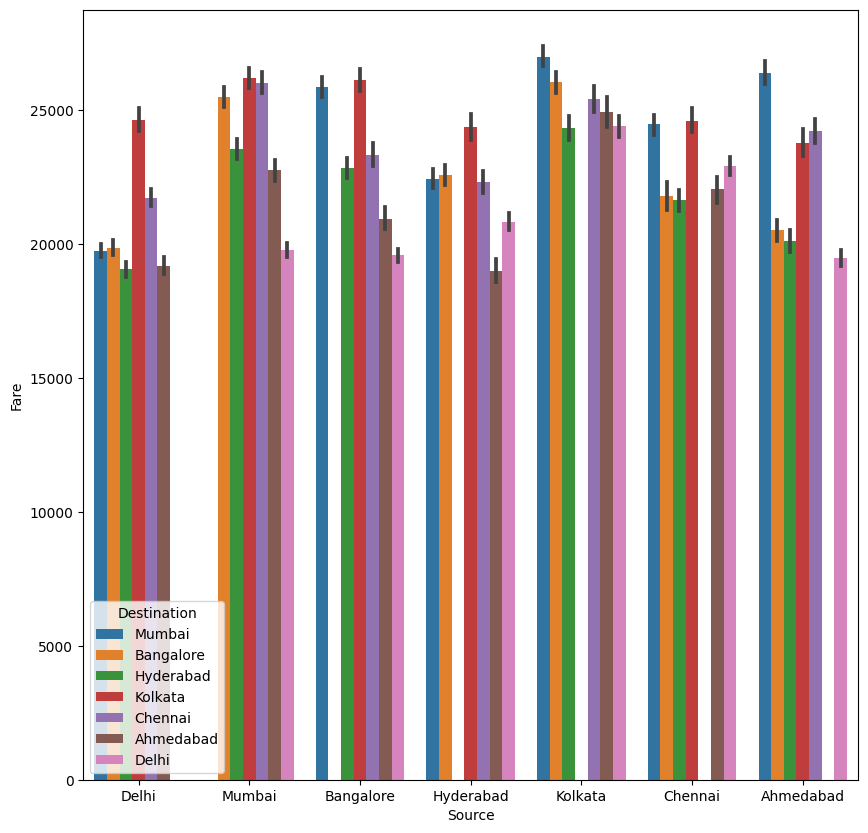

In [63]:
plt.figure(figsize=(10,10))
sns.barplot(x='Source',y='Fare',hue='Destination',data=dataset)
plt.show()

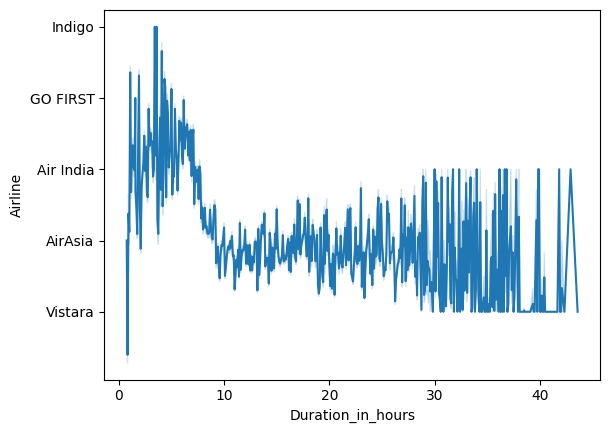

In [64]:
sns.lineplot(x='Duration_in_hours',y='Airline',data=dataset)
plt.show()

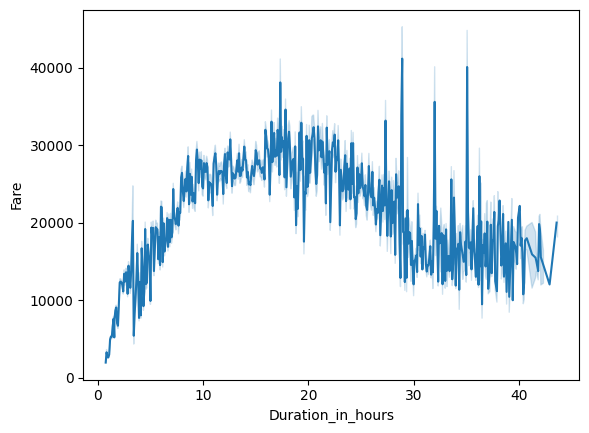

In [65]:
sns.lineplot(x='Duration_in_hours',y='Fare',data=dataset)
plt.show()

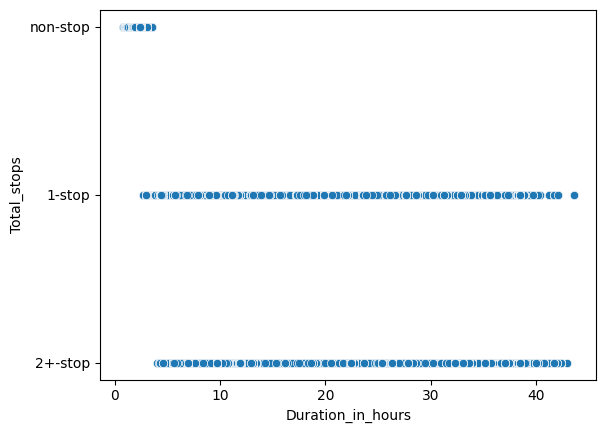

In [66]:
sns.scatterplot(x='Duration_in_hours',y='Total_stops',data=dataset)
plt.show()

#Results from the Observations
1)Fare is maximum for 1-stops.

2)Fare is maximum for kolkata to Mumbai.

3)Airindia and Vistara has maximum fare.

4)Day of journey is not much effecting the fare.


#Train Test split.

In [67]:
X=dataset.drop(columns=['Fare'],axis=1)
Y=dataset['Fare']

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
X.shape,X_train.shape,X_test.shape

((452088, 12), (361670, 12), (90418, 12))

#Handling the categorical column.

For training set.


In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361670 entries, 207491 to 345353
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    361670 non-null  object 
 1   Journey_day        361670 non-null  object 
 2   Airline            361670 non-null  object 
 3   Flight_code        361670 non-null  object 
 4   Class              361670 non-null  object 
 5   Source             361670 non-null  object 
 6   Departure          361670 non-null  object 
 7   Total_stops        361670 non-null  object 
 8   Arrival            361670 non-null  object 
 9   Destination        361670 non-null  object 
 10  Duration_in_hours  361670 non-null  float64
 11  Days_left          361670 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 35.9+ MB


In [70]:
X_train['Journey_day'].value_counts()

Monday       57725
Thursday     51320
Friday       51092
Wednesday    50997
Tuesday      50735
Saturday     50023
Sunday       49778
Name: Journey_day, dtype: int64

In [71]:
X_train['Class'].value_counts()

Economy            201542
Business           101492
Premium Economy     58516
First                 120
Name: Class, dtype: int64

In [72]:

X_train['Airline'].value_counts()

Vistara        185272
Air India       95785
Indigo          52594
AirAsia         12535
GO FIRST         8659
SpiceJet         4667
AkasaAir         1785
AllianceAir       325
StarAir            48
Name: Airline, dtype: int64

In [73]:
X_train['Arrival'].value_counts()

After 6 PM      160220
6 AM - 12 PM     95818
12 PM - 6 PM     81028
Before 6 AM      24604
Name: Arrival, dtype: int64

In [74]:

X_train['Departure'].value_counts()

6 AM - 12 PM    147957
After 6 PM      102520
12 PM - 6 PM     92535
Before 6 AM      18658
Name: Departure, dtype: int64

In [75]:

X_train['Destination'].value_counts()

Mumbai       66303
Delhi        62287
Bangalore    57987
Hyderabad    50015
Chennai      46112
Kolkata      43559
Ahmedabad    35407
Name: Destination, dtype: int64

In [76]:

X_train['Source'].value_counts()

Delhi        66654
Mumbai       64531
Bangalore    58646
Hyderabad    45354
Chennai      45236
Kolkata      44459
Ahmedabad    36790
Name: Source, dtype: int64

In [77]:
X_train['Total_stops'].value_counts()

1-stop      295721
non-stop     41380
2+-stop      24569
Name: Total_stops, dtype: int64

Giving label to the categories.

In [78]:
#Class
label_1 = X_train.replace({'Class':{'First':0,'Business':1,'Premium Economy':2,'Economy':3}},inplace=True)


In [79]:
#Airline
label_2 = X_train.replace({'Airline':{'Vistara':0,'Air India':1,'Indigo':2,'AirAsia':3,'GO FIRST':4,'SpiceJet':5,'AkasaAir':6,
                                      'AllianceAir':7,'StarAir':8}},inplace=True)

In [80]:
#Destination
label_3=X_train.replace({'Destination':{'Ahmedabad':0,'Bangalore':1,'Chennai':2,'Delhi':3,'Hyderabad':4,'Kolkata':5,'Mumbai':6}},inplace=True)

In [81]:
#Source
label_4=X_train.replace({'Source':{'Ahmedabad':0,'Bangalore':1,'Chennai':2,'Delhi':3,'Hyderabad':4,'Kolkata':5,'Mumbai':6}},inplace=True)

In [82]:
#Arrival
label_5=X_train.replace({'Arrival':{'After 6 PM':0,'Before 6 AM':1,'6 AM - 12 PM':2,'12 PM - 6 PM':3}},inplace=True)

In [83]:
#Departure
label_6=X_train.replace({'Departure':{'After 6 PM':0,'Before 6 AM':1,'6 AM - 12 PM':2,'12 PM - 6 PM':3}},inplace=True)

In [84]:
#Total stops
label_7=X_train.replace({'Total_stops':{'1-stop':0,'2+-stop':1,'non-stop':2}},inplace=True)

In [85]:
#Handling the date column
#Extracting the day of journey
X_train['Day']=pd.to_datetime(X_train['Date_of_journey'],format='%Y-%m-%d').dt.day

In [86]:

#Extracting the month of journey
X_train['month']=pd.to_datetime(X_train['Date_of_journey'],format='%Y-%m-%d').dt.month

We have to drop some column

1)Journey day and Date_of_journey - because we extract day,month and created a new column.

2)Flight code - because we already have flight name column.

In [87]:
X_train = X_train.drop(columns=['Date_of_journey','Journey_day','Flight_code'],axis=1)

In [88]:
X_train.head()

,Airline,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Day,month
207491,1,3,1,0,0,3,4,17.1667,40,24,2
351805,0,1,2,0,0,2,3,11.4167,9,24,1
124122,1,3,6,0,0,3,4,17.0000,33,17,2
160267,0,1,6,0,0,0,0,21.8333,31,15,2
121688,0,2,6,2,1,2,4,22.9167,24,8,2


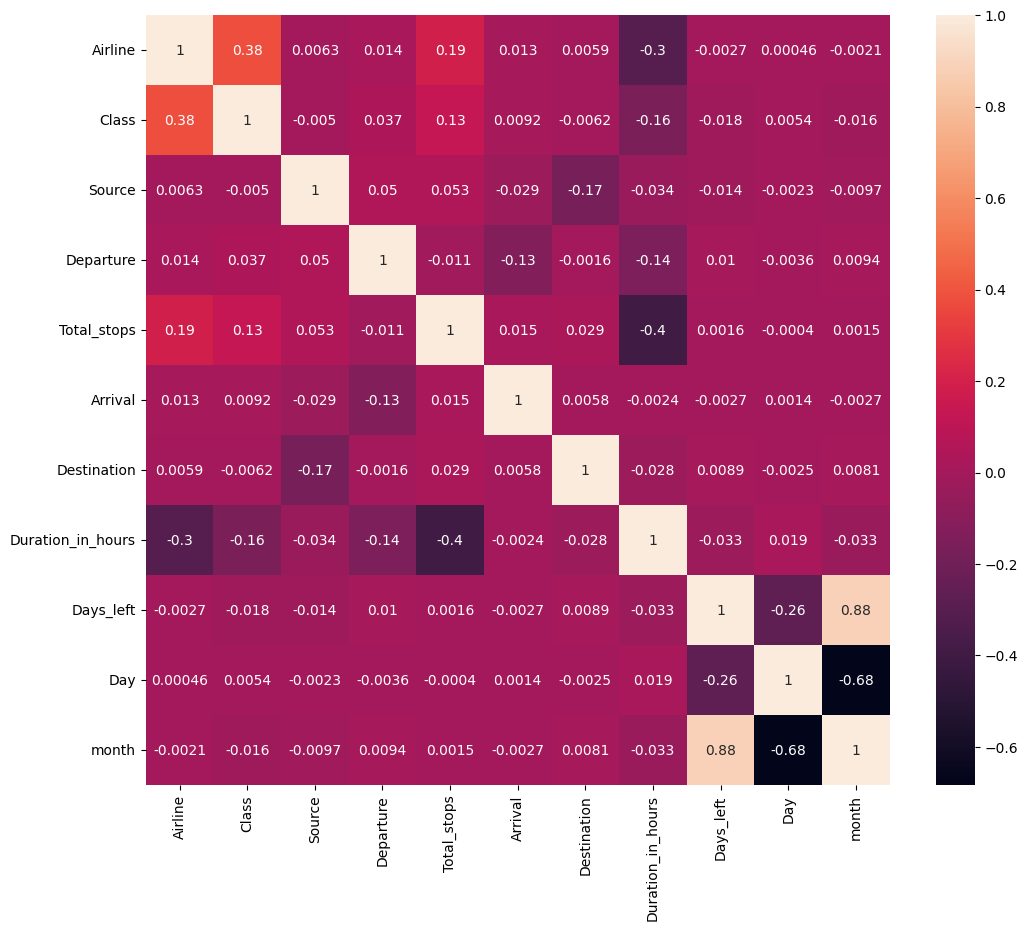

In [89]:
#corrlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True)
plt.show()

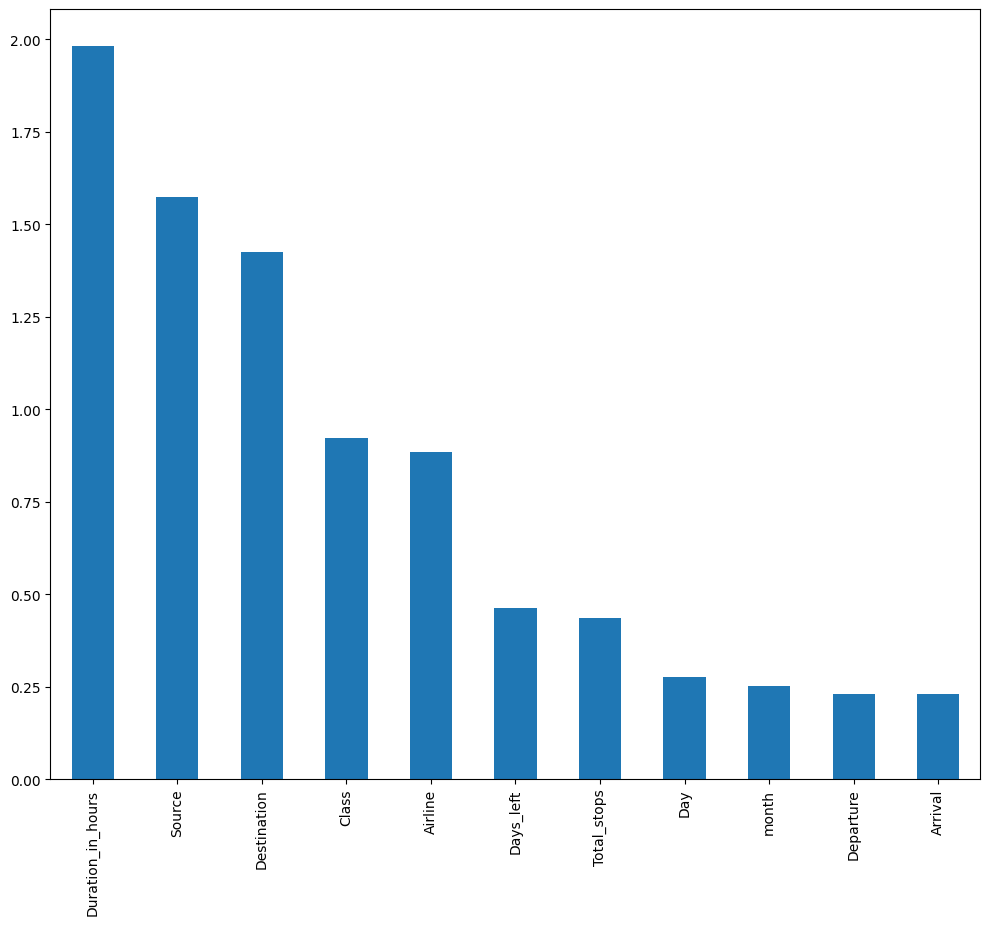

In [90]:
#Complex relation of features and target variable
#mutual info regressor
from sklearn.feature_selection import mutual_info_regression
mutual = mutual_info_regression(X_train,Y_train)
selection = pd.Series(mutual)
selection.index = X_train.columns
selection.sort_values(ascending=False).plot.bar(figsize=(12,10))
plt.show()


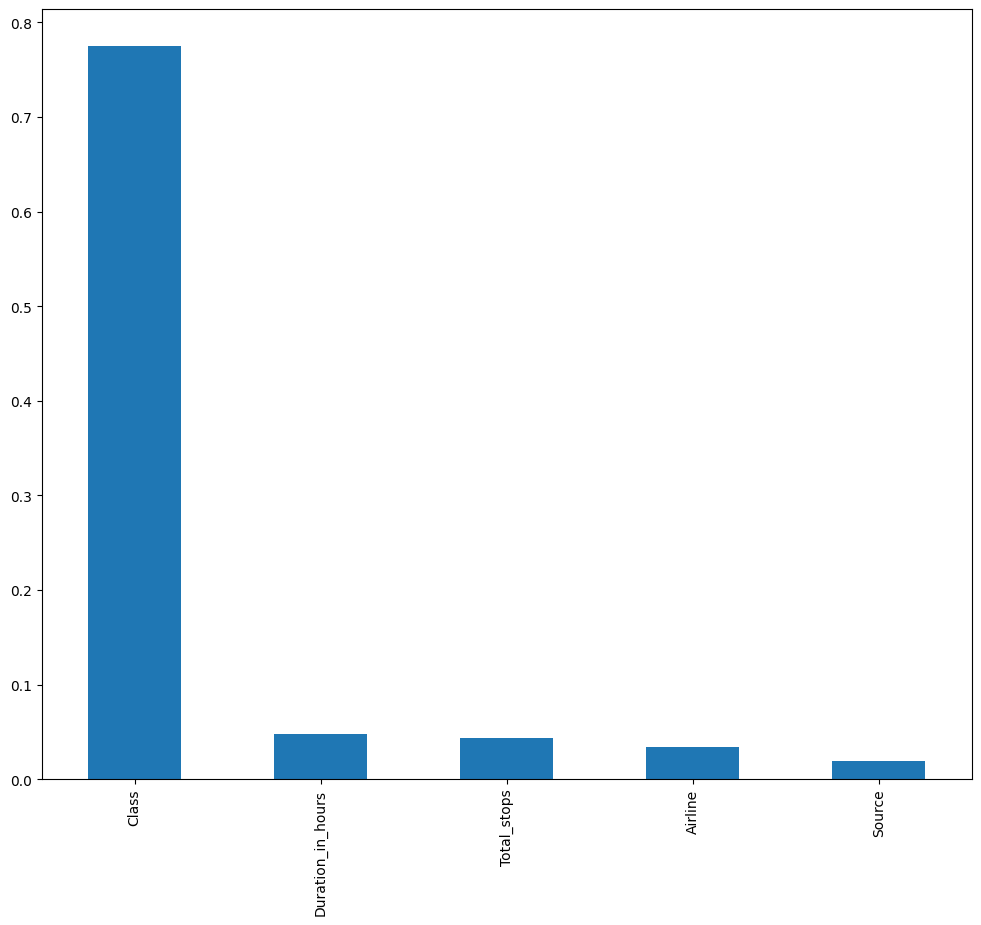

In [91]:
from sklearn.ensemble import ExtraTreesRegressor
tree = ExtraTreesRegressor()
tree.fit(X_train,Y_train)
feat = pd.Series(tree.feature_importances_,index=X_train.columns)
feat.nlargest(5).plot.bar(figsize=(12,10))
plt.show()

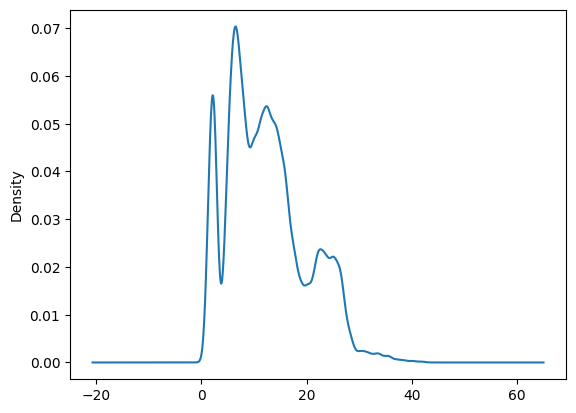

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Duration_in_hours'].plot(kind='kde',ax=ax)
plt.show()

For Test data.

In [93]:
#Class
label_8 = X_test.replace({'Class':{'First':0,'Business':1,'Premium Economy':2,'Economy':3}},inplace=True)


In [94]:
#Airline
label_9 = X_test.replace({'Airline':{'Vistara':0,'Air India':1,'Indigo':2,'AirAsia':3,'GO FIRST':4,'SpiceJet':5,'AkasaAir':6,
                                      'AllianceAir':7,'StarAir':8}},inplace=True)

In [95]:
#Destination
label_10=X_test.replace({'Destination':{'Ahmedabad':0,'Bangalore':1,'Chennai':2,'Delhi':3,'Hyderabad':4,'Kolkata':5,'Mumbai':6}},inplace=True)

In [96]:
#Source
label_11=X_test.replace({'Source':{'Ahmedabad':0,'Bangalore':1,'Chennai':2,'Delhi':3,'Hyderabad':4,'Kolkata':5,'Mumbai':6}},inplace=True)

In [97]:
#Arrival
label_12=X_test.replace({'Arrival':{'After 6 PM':0,'Before 6 AM':1,'6 AM - 12 PM':2,'12 PM - 6 PM':3}},inplace=True)

In [98]:
#Departure
label_13=X_test.replace({'Departure':{'After 6 PM':0,'Before 6 AM':1,'6 AM - 12 PM':2,'12 PM - 6 PM':3}},inplace=True)

In [99]:
#Total stops
label_14=X_test.replace({'Total_stops':{'1-stop':0,'2+-stop':1,'non-stop':2}},inplace=True)

In [100]:
#Handling the date column
#Extracting the day of journey
X_test['Day']=pd.to_datetime(X_test['Date_of_journey'],format='%Y-%m-%d').dt.day

In [101]:

#Extracting the month of journey
X_test['month']=pd.to_datetime(X_test['Date_of_journey'],format='%Y-%m-%d').dt.month

In [102]:
X_test = X_test.drop(columns=['Date_of_journey','Journey_day','Flight_code'],axis=1)

#Model and Algorithms.

In [103]:
#importing the dependencies
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


In [104]:
#For training data
models = [LinearRegression(),Lasso(),XGBRegressor(),RandomForestRegressor()]
for model in models:
  model.fit(X_train,Y_train)
  X_train_prediction = model.predict(X_train)
  from sklearn import metrics
  R2_score1 = metrics.r2_score(X_train_prediction,Y_train)
  mean_1 = metrics.mean_absolute_error(X_train_prediction,Y_train)
  print('r2_score of the:',model,'=',R2_score1)
  print('mean absolute error of:',model,'=',mean_1)

r2_score of the: LinearRegression() = 0.687740769269201
mean absolute error of: LinearRegression() = 6984.413319299613


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.714e+13, tolerance: 1.492e+10
  model = cd_fast.enet_coordinate_descent(


r2_score of the: Lasso() = 0.6874019252898185
mean absolute error of: Lasso() = 6982.574860856945
r2_score of the: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) = 0.9287522971693564
mean absolute error of: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=No

In [105]:
#For test data
for model in models:
  X_test_prediction = model.predict(X_test)
  from sklearn import metrics
  R2_score2 = metrics.r2_score(X_test_prediction,Y_test)
  mean_2 = metrics.mean_absolute_error(X_test_prediction,Y_test)
  print('r2_score of the:',model,'=',R2_score2)
  print('mean absolute error of:',model,'=',mean_2)

r2_score of the: LinearRegression() = 0.687602079295317
mean absolute error of: LinearRegression() = 6994.290675972728
r2_score of the: Lasso() = 0.6873028835793937
mean absolute error of: Lasso() = 6992.419403992471
r2_score of the: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) = 0.926588208719927

RandomForest giving good results on training and test data.

#Hypertuning

In [106]:
random = RandomForestRegressor()
random.fit(X_train,Y_train)
train = random.predict(X_train)
Y_prediction = random.predict(X_test)
Y_prediction[:5]

array([55507.66, 14483.64, 56825.  , 20916.24, 10454.46])

In [107]:
Y_test[:5]

391759    54641
35230     14468
269585    56825
224453    19893
352752    11839
Name: Fare, dtype: int64

it is giving nearly good result without hypertunung


#ScatterPlot for test

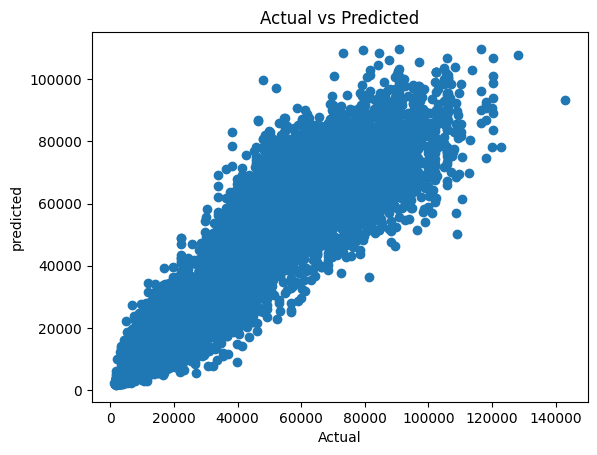

In [108]:
plt.scatter(Y_test,Y_prediction)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs Predicted')
plt.show()

#Scatter plot for training data.


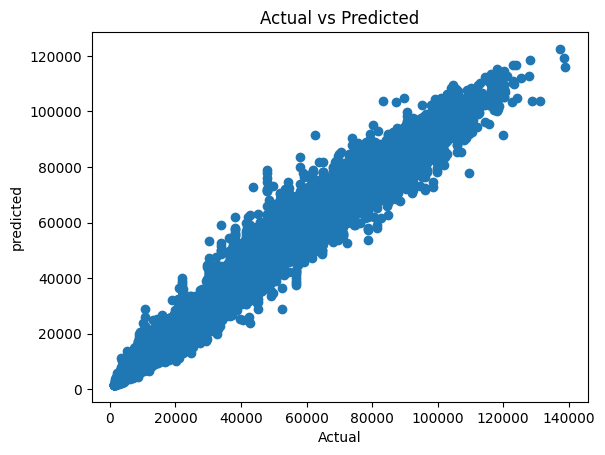

In [109]:
plt.scatter(Y_train,train)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
import pickle
import os
file_path='/content/drive/MyDrive/Flight_fare_prediction'
os.chdir(file_path)
with open('model2.pickle','wb') as model_file:
  pickle.dump(random,model_file)

In [ ]:
import pickle
import numpy as np



In [ ]:
#loading the model
pickle_file_path = '/content/drive/MyDrive/CO2_emission_project/model.pickle'
with open(pickle_file_path , 'rb') as model_file:
  loaded_model = pickle.load(model_file)

